# Decison Tree

In [36]:
#. loading the required libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn import tree
from sklearn.model_selection import train_test_split

In [37]:
data = pd.read_csv('car_data.csv')

In [40]:
data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [13]:
data.head()

#. Purchase Decision (No = 0; Yes = 1)
#. Purchased is the target, trying to predict if a customer will buy a car based on their Gender, Age or Salary.

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [41]:
data.isna().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [42]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User ID,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
Age,1000.0,40.106,10.707073,18.0,32.00,40.0,48.00,63.0
AnnualSalary,1000.0,72689.000,34488.341867,15000.0,46375.00,72000.0,90000.00,152500.0
Purchased,1000.0,0.402,0.490547,0.0,0.00,0.0,1.00,1.0


In [16]:
#. encoding Gender using one hot encoder

#
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#
#ohe = OneHotEncoder() # declares an instance of the object 
#ohe_data=ohe.fit_transform(data[['Gender']]).toarray() # applies the object to data 
#feature_labels = ohe.categories_ #. labels are stored here
#df_ohe = pd.DataFrame(ohe_data, columns = feature_labels)
#new_df_ohe = pd.concat([data, df_ohe], axis = 1) # combining the original dataframe (df) and df_ohe
#    
#new_df_ohe.drop('Gender', axis=1, inplace=True)
#
#new_df_ohe.head()

In [43]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [46]:
le = LabelEncoder() #. declares an instance of the object

le_data = le.fit_transform(data[['Gender']]) #. applies object to data

df_le = pd.DataFrame(le_data, columns = ['GenderNew']) #. creates a dataframe
df_le.head()

new_df = pd.concat([data, df_le], axis = 1)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
df_le.head()

,GenderNew
0,1
1,1
2,1
3,1
4,1


In [47]:
new_df.head()

,User ID,Gender,Age,AnnualSalary,Purchased,GenderNew
0,385,Male,35,20000,0,1
1,681,Male,40,43500,0,1
2,353,Male,49,74000,0,1
3,895,Male,40,107500,1,1
4,661,Male,25,79000,0,1


In [48]:
new_df.drop('Gender', axis=1, inplace=True)

In [49]:
new_df.head()

,User ID,Age,AnnualSalary,Purchased,GenderNew
0,385,35,20000,0,1
1,681,40,43500,0,1
2,353,49,74000,0,1
3,895,40,107500,1,1
4,661,25,79000,0,1


<AxesSubplot: >

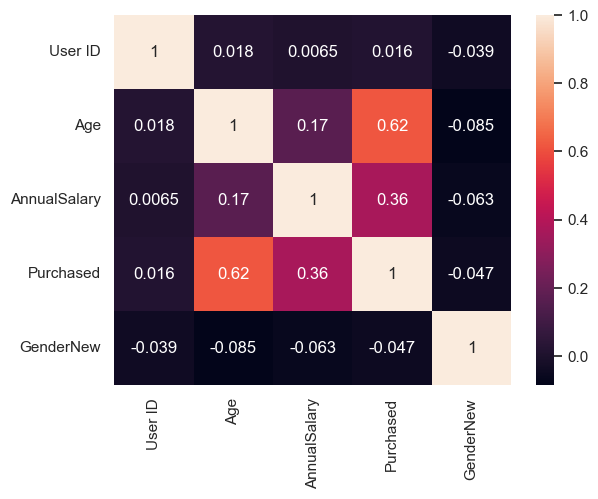

In [50]:
sns.heatmap(new_df.corr(), annot = True)

In [51]:
#. Building the model, splitting the dataset and scaling

X = new_df.drop('Purchased', axis = 1)
y = new_df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

X,y= X_train, y_train

#X_train, y_train = train_test_split(X,y, test_size=0.3, random_state=42)

In [23]:
X_train

,User ID,Age,AnnualSalary,GenderNew
541,582,50,29500,1
440,169,47,107000,0
482,430,42,75000,0
422,31,28,59500,0
778,359,48,47500,0
...,...,...,...,...
106,398,36,56500,1
270,35,42,53000,0
860,626,37,33000,0
435,931,43,112000,0


In [24]:
X_test

,User ID,Age,AnnualSalary,GenderNew
521,176,41,73500,1
737,448,59,135500,1
740,391,25,59500,1
660,623,47,42500,0
411,773,46,135500,0
...,...,...,...,...
468,66,59,106500,0
935,539,35,65000,0
428,71,42,46500,1
7,588,42,64000,1


In [25]:
y_train

541    1
440    1
482    0
422    0
778    1
      ..
106    0
270    0
860    0
435    1
102    0
Name: Purchased, Length: 700, dtype: int64

In [26]:
y_test

521    0
737    1
740    0
660    1
411    0
      ..
468    1
935    0
428    0
7      0
155    1
Name: Purchased, Length: 300, dtype: int64

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)  
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns) 


In [52]:
model = tree.DecisionTreeClassifier(criterion='gini') 
# for classification, here you can change the algorithm as gini or entropy (information gain) 
#by default it is gini
# model = tree.DecisionTreeRegressor() for regression

# Train the model using the training sets and check score
model.fit(X_train_scaled, y_train)

model.score(X_train_scaled, y_train)

#Predict Output
predicted = model.predict(X_test_scaled)

Text(110.44999999999997, 0.5, 'Predicted')

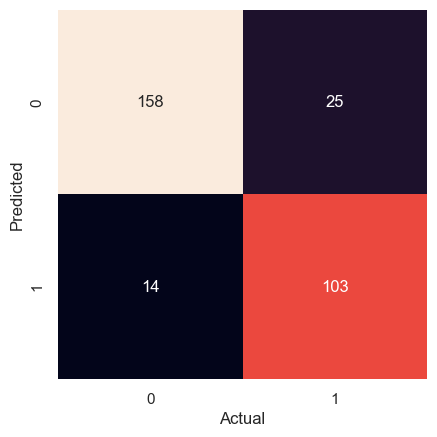

In [29]:
#. Purchase Decision (No = 0; Yes = 1)

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(predicted, y_test)
names = np.unique(predicted)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=names, yticklabels=names)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [30]:
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay,
plot_roc_curve,roc_auc_score)

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       172
           1       0.88      0.80      0.84       128

    accuracy                           0.87       300
   macro avg       0.87      0.86      0.87       300
weighted avg       0.87      0.87      0.87       300



In [31]:
print(accuracy_score(y_test, predicted))

0.87


In [32]:
path = model.cost_complexity_pruning_path(X_train_scaled, y_train)

alphas = path['ccp_alphas']

alphas

array([0.        , 0.0009375 , 0.00095238, 0.00107143, 0.00114286,
       0.00114286, 0.00114286, 0.00122449, 0.00126984, 0.00126984,
       0.00128571, 0.00131429, 0.00136905, 0.00146032, 0.00152381,
       0.00163297, 0.00166234, 0.00182011, 0.00190476, 0.00203175,
       0.00203175, 0.00205058, 0.00222041, 0.00231768, 0.0023767 ,
       0.00238095, 0.00245393, 0.00261224, 0.00267857, 0.00290291,
       0.0034632 , 0.00460354, 0.00463492, 0.00692714, 0.13525692,
       0.18168008])

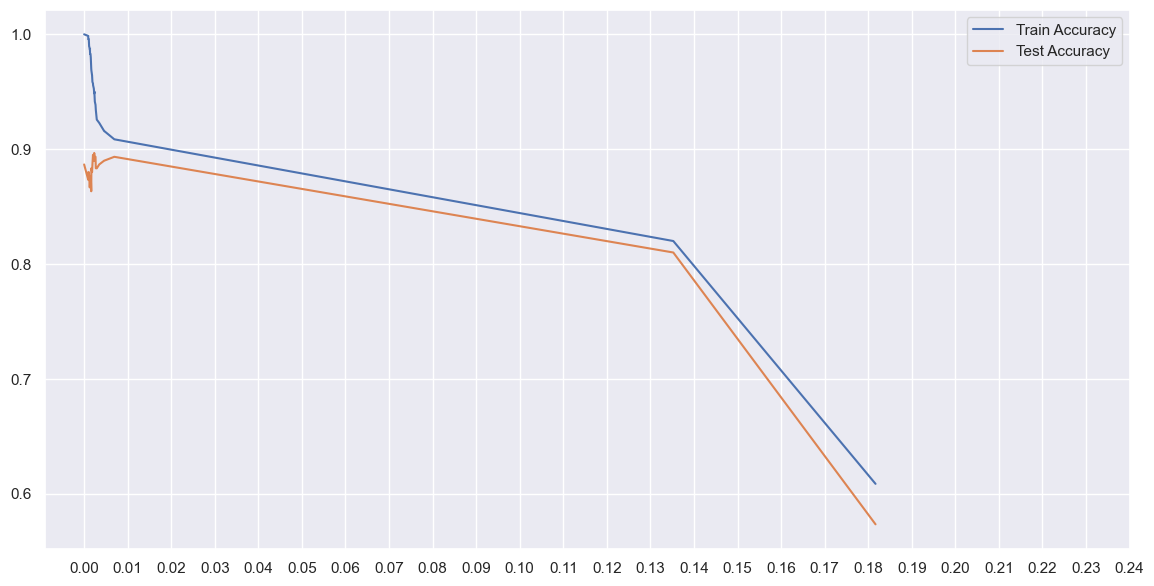

In [33]:
accuracy_train, accuracy_test = [],[]

for i in alphas:
    model = tree.DecisionTreeClassifier(ccp_alpha=i)
    
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))
    
    
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=alphas,label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=alphas,label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00,0.25,0.01))
plt.show()

In [34]:
model = tree.DecisionTreeClassifier(ccp_alpha=0.02,random_state=40)
model.fit(X_train_scaled, y_train)
y_train_pred= model.predict(X_train_scaled)
y_test_pred= model.predict(X_test_scaled)

print(accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred))

0.9085714285714286 0.8933333333333333


              precision    recall  f1-score   support

           0       0.91      0.91      0.91       172
           1       0.88      0.88      0.88       128

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



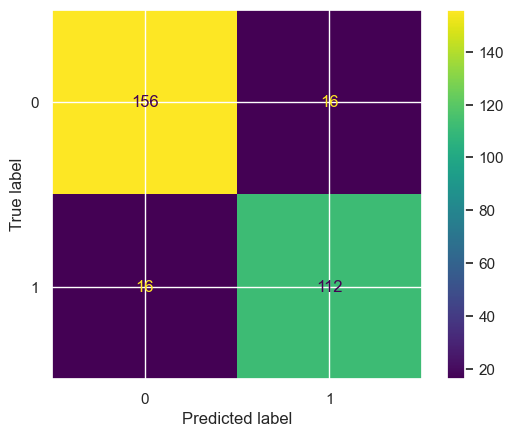

<Figure size 8000x8000 with 0 Axes>

In [35]:
#. Random Forest

from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier()

model.fit(X_train_scaled,y_train) 
basem_preds = model.predict(X_test_scaled)     
print(classification_report(y_test,basem_preds)) 
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
plt.show() 
plt.figure(figsize=(40,40), dpi = 200); 